## 데이터 척도 scale
1. 질적 / 범주형 데이터 / 척도<br>
1) 명목척도(nominal scale)
- 범주나 종류에 따라 분류되며 척도
- 남자 1, 여자 2 <= 숫자는 범주 구분 외에 수학적 의미를 갖지 않음
2) 서열척도(ordinal scale)
- 제품선호도, 순위 등 서열관계를 나타내는 척도
- 척도 사이의 서열(크다, 작다)은 있으나, 산술적 의미는 없다.
2. 양적 / 수치 데이터 / 척도<br>
1) 구간척도(interval scale)
- 구간 간격은 산술적 의미는 있으나 비율적 의미는 없다.
- 시험성적 등 <= 0의 값은 존재하나, 절대적 가치를 갖지 않는다.
2) 비율척도(ratio scale)
- 숫자 간 비율 의미 <= 절대 영점 존재
- 키, 무게, 압력 등

## 연습문제 1

In [1]:
import pandas as pd
Dickens = pd.read_csv('CharlesDickens.txt', sep='\t', index_col = 'year')
Dickens

,Charles Dickens,Merry Christmas
year,,
1800,9.591359e-08,0.000000e+00
1801,7.673087e-08,0.000000e+00
1802,6.394240e-08,0.000000e+00
1803,5.480777e-08,0.000000e+00
1804,9.697444e-09,0.000000e+00
...,...,...
1996,7.728564e-07,3.585443e-07
1997,7.895338e-07,3.711669e-07
1998,7.841867e-07,3.710718e-07


## 연습문제 2 vlines, hlines
- 데이터프레임 Dickens의 Charles Dickens을 이용하여 다음의 line chart를 만드시오.



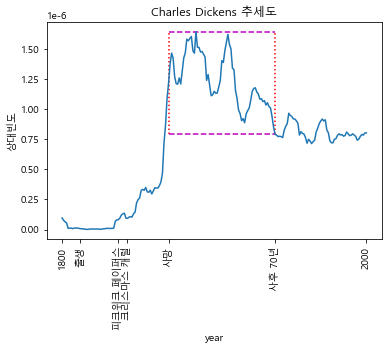

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
Dickens['Charles Dickens'].plot()
plt.xticks([1800,1812,1837,1843,1870,1940,2000],
          [1800,'출생','피크위크 페이퍼스','크리스마스 캐럴',
          '사망','사후 70년',2000], rotation = 90)
plt.title('Charles Dickens 추세도')
plt.ylabel('상대빈도')

# 수직선
plt.vlines([1870, 1940], Dickens.loc[1940, 'Charles Dickens'],
          Dickens['Charles Dickens'].max(),
          colors = 'r', linestyles=':')
# 수평선
plt.hlines([Dickens['Charles Dickens'].max(),
           Dickens.loc[1940, 'Charles Dickens']],
          1870, 1940, colors = 'm', linestyles='--')

## 연습문제 3

Text(0, 0.5, '상대빈도')

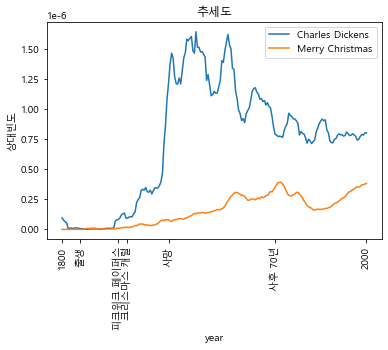

In [13]:
Dickens.plot()
plt.xticks([1800,1812,1837,1843,1870,1940,2000],
          [1800,'출생','피크위크 페이퍼스','크리스마스 캐럴',
          '사망','사후 70년',2000], rotation = 90)
plt.title('추세도')
plt.ylabel('상대빈도')

## scatter plot

Text(0, 0.5, 'Charles Dickens')

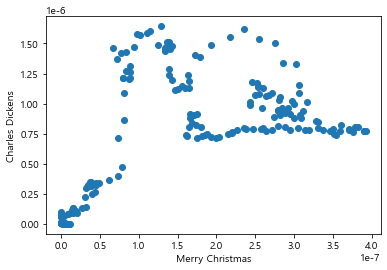

In [14]:
plt.scatter(Dickens['Merry Christmas'], Dickens['Charles Dickens'])
plt.xlabel('Merry Christmas')
plt.ylabel('Charles Dickens')

결론 : 비정규분포이고 선형적 관계가 아님을 파악할 수 있음.

In [15]:
import numpy as np
np.polyfit(Dickens['Charles Dickens'],
          Dickens['Merry Christmas'], 1) # 1이면 하나 단순 선형 회귀 1차

array([1.40994201e-01, 5.26070142e-08])

In [16]:
a, b = np.polyfit(Dickens['Charles Dickens'],
                 Dickens['Merry Christmas'], 1)
print(a,b)   # 회귀 계수 y = ax + b

0.14099420070143043 5.26070141642827e-08


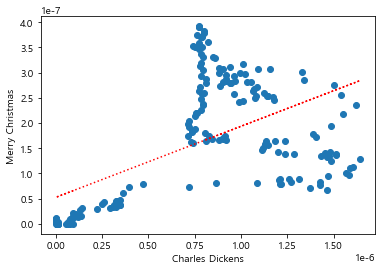

In [17]:
plt.scatter(Dickens['Charles Dickens'], Dickens['Merry Christmas'])
plt.xlabel('Charles Dickens')
plt.ylabel('Merry Christmas')
plt.plot(Dickens['Charles Dickens'], 
        a * Dickens['Charles Dickens'] + b , ':r')

## histogram
- 수치척도 : 구간별 빈도분포 & 데이터 분포 파악

<AxesSubplot:>

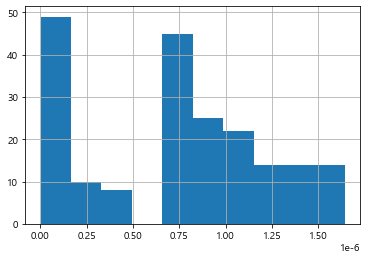

In [18]:
Dickens['Charles Dickens'].hist()

정규 분포에만 적용 가능한 통계 기법  X <br>
비정규 분포에만 적용가능한 통계 기법 사용 O

<AxesSubplot:>

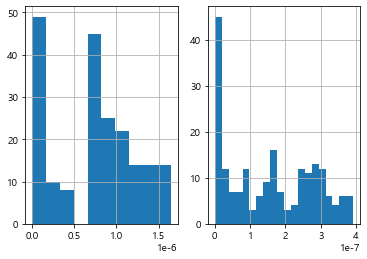

In [24]:
plt.subplot(1,2,1)
Dickens['Charles Dickens'].hist(bins=10)
plt.subplot(1,2,2)
Dickens['Merry Christmas'].hist(bins=20)

20에서 막대의 계수와 간격이 좁다 (많을 수록 세분화되서 출력)
이걸로 봐도 정규분포가 아님

## box plot

<AxesSubplot:>

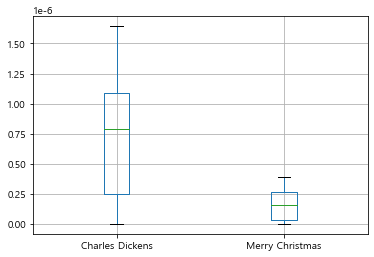

In [25]:
Dickens.boxplot()

수치 척도 : 사분위 분포 & 데이터 분포 파악

## 그림 저장하기

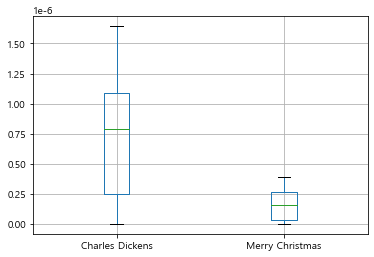

In [26]:
Dickens.boxplot()
plt.savefig('boxplot.png',dpi=200) #dpi 해상도